In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/amit_/Downloads/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

(   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
 0  Female  21.0    1.62    64.0                            yes   no   2.0   
 1  Female  21.0    1.52    56.0                            yes   no   3.0   
 2    Male  23.0    1.80    77.0                            yes   no   2.0   
 3    Male  27.0    1.80    87.0                             no   no   3.0   
 4    Male  22.0    1.78    89.8                             no   no   2.0   
 
    NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
 0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
 1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
 2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
 3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
 4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
 
                   MTRANS           NObeyesdad  
 0  Public_Transportation        Normal_Weight  
 1  Public_Transportation        Normal_Weight  
 2  Public_Tran

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import Birch

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply BIRCH clustering
birch_model = Birch()
birch_clusters = birch_model.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
data['Cluster'] = birch_clusters

# Display the first few rows of the dataframe with the cluster labels
data.head(), data['Cluster'].value_counts()


(   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
 0       0  21.0    1.62    64.0                               1     0   2.0   
 1       0  21.0    1.52    56.0                               1     0   3.0   
 2       1  23.0    1.80    77.0                               1     0   2.0   
 3       1  27.0    1.80    87.0                               0     0   3.0   
 4       1  22.0    1.78    89.8                               0     0   2.0   
 
    NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  Cluster  
 0  3.0     2      0   2.0    0  0.0  1.0     3       3           1        0  
 1  3.0     2      1   3.0    1  3.0  0.0     2       3           1        2  
 2  3.0     2      0   2.0    0  2.0  1.0     1       3           1        0  
 3  3.0     2      0   2.0    0  2.0  0.0     1       4           5        0  
 4  1.0     2      0   2.0    0  0.0  0.0     2       3           6        0  ,
 Cluster
 0    1714
 1     353
 2      44
 

In [4]:
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_score, completeness_score, v_measure_score

# True labels
true_labels = data['NObeyesdad']

# Clustering labels
cluster_labels = data['Cluster']

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, cluster_labels)

# Silhouette Score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)

# Homogeneity Score
homogeneity = homogeneity_score(true_labels, cluster_labels)

# Completeness Score
completeness = completeness_score(true_labels, cluster_labels)

# V-measure Score
v_measure = v_measure_score(true_labels, cluster_labels)

ari, silhouette_avg, homogeneity, completeness, v_measure 
#Overall, these metrics suggest that the BIRCH algorithm did not perform well in clustering the data with respect to the true labels in this dataset. 
#This could be due to the complexity of the data or the nature of the clustering algorithm.


(0.01410389530963254,
 0.11185814686122068,
 0.04562253630451115,
 0.16146288365236156,
 0.07114307007026405)

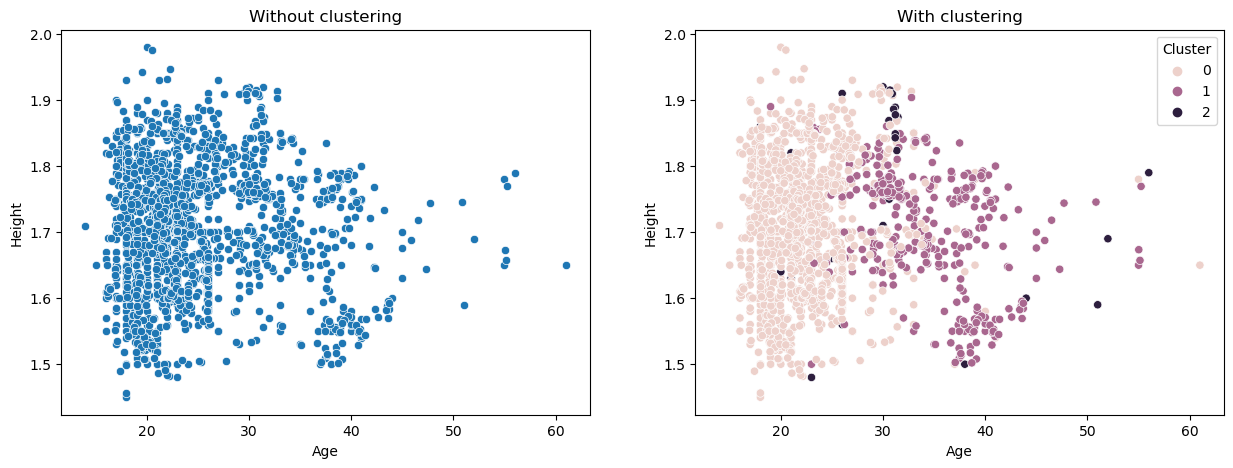

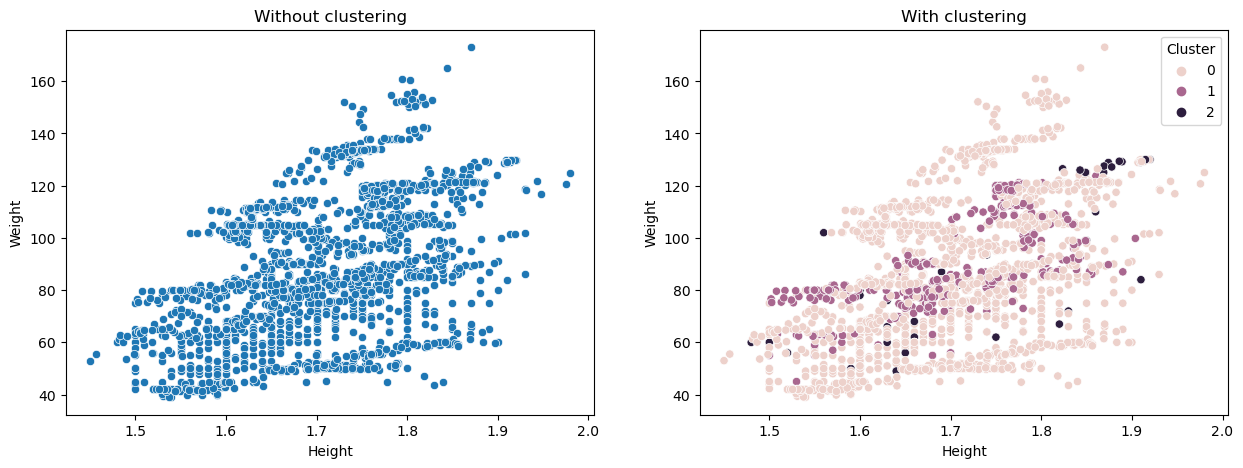

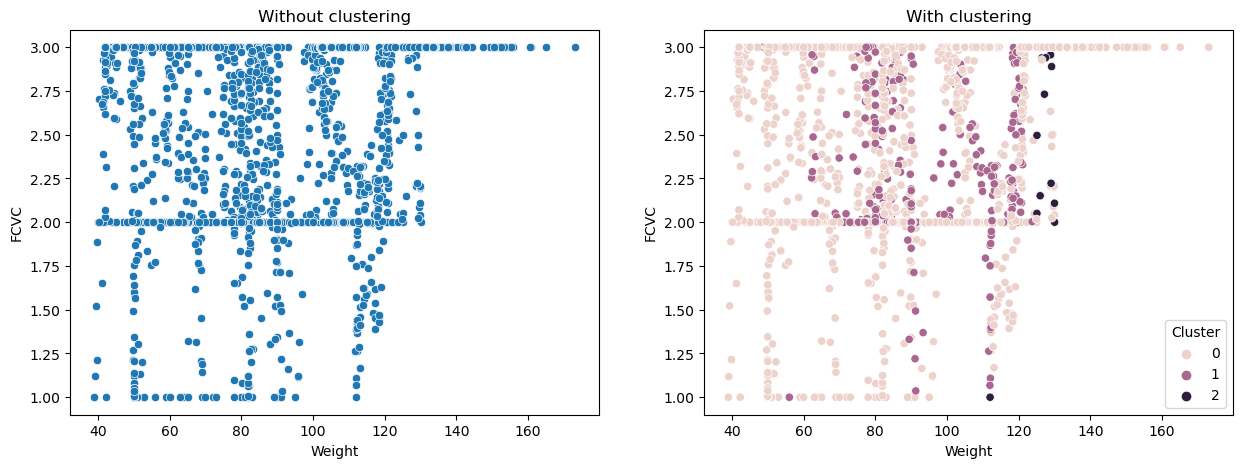

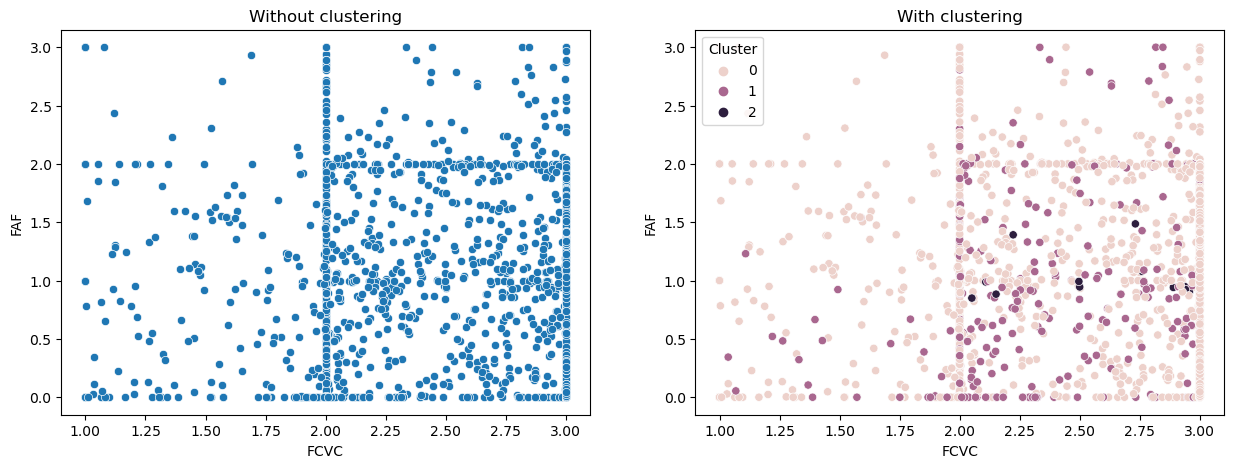

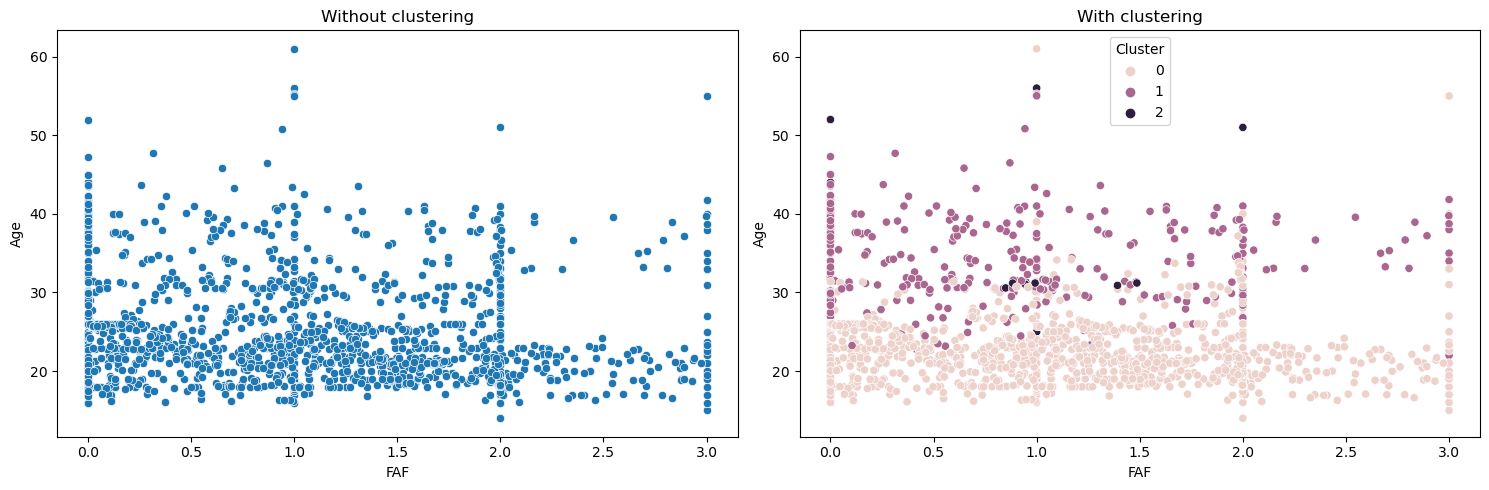

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of features for visualization
features = ['Age', 'Height', 'Weight', 'FCVC', 'FAF']

# Create scatter plots for each pair of features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.scatterplot(ax=axes[0], data=data, x='Age', y='Height').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=data, x='Age', y='Height', hue='Cluster').set_title('With clustering')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.scatterplot(ax=axes[0], data=data, x='Height', y='Weight').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=data, x='Height', y='Weight', hue='Cluster').set_title('With clustering')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.scatterplot(ax=axes[0], data=data, x='Weight', y='FCVC').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=data, x='Weight', y='FCVC', hue='Cluster').set_title('With clustering')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.scatterplot(ax=axes[0], data=data, x='FCVC', y='FAF').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=data, x='FCVC', y='FAF', hue='Cluster').set_title('With clustering')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.scatterplot(ax=axes[0], data=data, x='FAF', y='Age').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=data, x='FAF', y='Age', hue='Cluster').set_title('With clustering')

plt.tight_layout()
plt.show()
